In [141]:
import re
import os 
import sys 

import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io

from pathlib import Path
from tqdm.notebook import trange, tqdm
from joblib import Parallel, delayed
from skimage import exposure
import h5py
import pandas as pd
import scanpy as sc
import squidpy as sq
sc.settings.verbosity = 3

from matplotlib.pyplot import rc_context
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from functools import reduce
from matplotlib import cm, colors
import scanorama
import seaborn as sns 
import anndata as ad
from PIL import Image
import openTSNE


In [142]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
# Import path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path = str(Path.cwd().parents[0] / "src")
if module_path not in sys.path:
    sys.path.append(module_path)
    

In [144]:
from config import *
import my_io as io

In [145]:
data_ROI = data_dir / 'ROI_new'

# Manual gating

In [146]:
adata_path = data_ROI  / f"processed_scanorama_TCell_subset.h5ad"
if os.path.exists(adata_path):
    adata = ad.read_h5ad(adata_path)
else:
    print("Expression file not found")

In [147]:
df = pd.DataFrame(adata.X, columns=adata.var_names)

In [148]:
type_dict = {'0': 'Other',
            '1': 'Tumor',
            '2': 'M2', 
            '3': 'M1',
            '4': 'CD8+',
             '5': 'Tae',
             '6': 'Treg',
             '7': 'Trem',
             '8': 'TCF1+',
             '9': 'PD-L1+ M2',
             '10': 'PD-L1+ M1',
             '11': 'Stroma',
            }

In [149]:
# Manual gating

df['Type'] = '0'
df.loc[(df[["Pankeratin", "E-cadherin"]]>0.2).any(1), 'Type'] = '1'
df.loc[(df[["SMA", "COL1"]]>0.2).any(1), 'Type'] = '11'
df.loc[(df[["CD8"]]>0.4).all(1), 'Type'] = '4'
df.loc[(df[["CD8", 'CD45Ro', 'Ki67']]>0.2).all(1), 'Type'] = '5'
df.loc[(df[["CD4", 'FoxP3']]>0.2).all(1), 'Type'] = '6'
df.loc[(df[["CD8", 'CD103']]>0.2).all(1), 'Type'] = '7'
df.loc[(df[["CD8", 'TCF1']]>0.2).all(1), 'Type'] = '8'
df.loc[(df[["CD68", "CD163", "CD206"]]>0.2).all(1), 'Type'] = '2'
df.loc[(df[["CD68", "HLADR"]]>0.2).all(1), 'Type'] = '3'
df.loc[(df[["CD68", "CD163", "CD206", 'PDL1']]>0.2).all(1), 'Type'] = '9'
df.loc[(df[["CD68", "HLADR", 'PDL1']]>0.2).all(1), 'Type'] = '10'

In [150]:
adata.obs['Type'] = df.Type.tolist()
adata.obs['Type'] = (
    adata.obs['Type']
    .map(type_dict)
    .astype("category")
)
adata.uns['Type_colors'] = adata.uns['leiden_colors'][:len(np.unique(adata.obs['Type']))]

In [151]:
sc.tl.dendrogram(adata, groupby='Type')

    using data matrix X directly
Storing dendrogram info using `.uns['dendrogram_Type']`


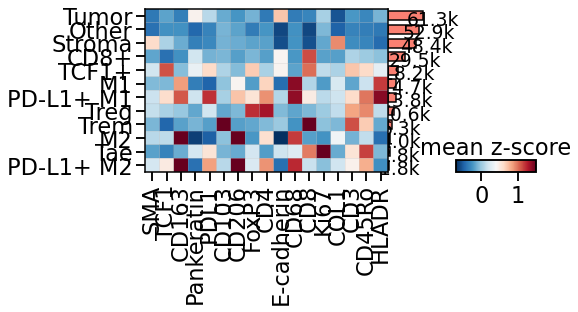

In [152]:

mp = sc.pl.matrixplot(adata, adata.var_names.tolist(), 'Type', dendrogram=True,
                 colorbar_title='mean z-score', cmap='RdBu_r', vmax=1.5, return_fig=True, figsize=(7,3))

mp.add_totals(sort='descending').show()

In [153]:
type_dict.values()

dict_values(['Other', 'Tumor', 'M2', 'M1', 'CD8+', 'Tae', 'Treg', 'Trem', 'TCF1+', 'PD-L1+ M2', 'PD-L1+ M1', 'Stroma'])

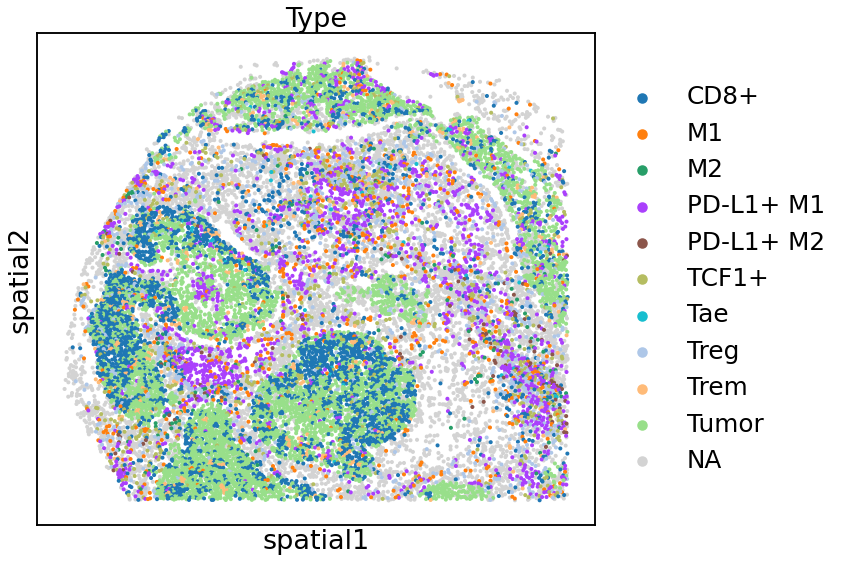

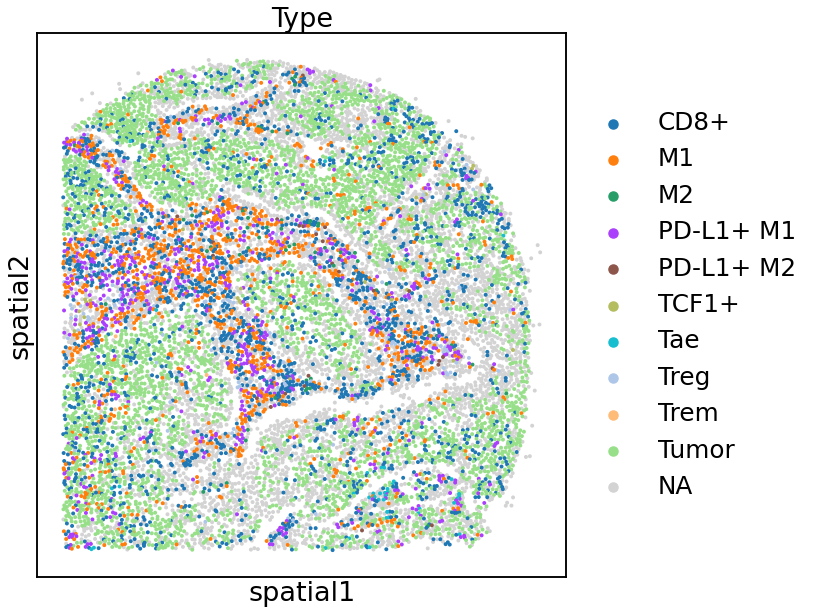

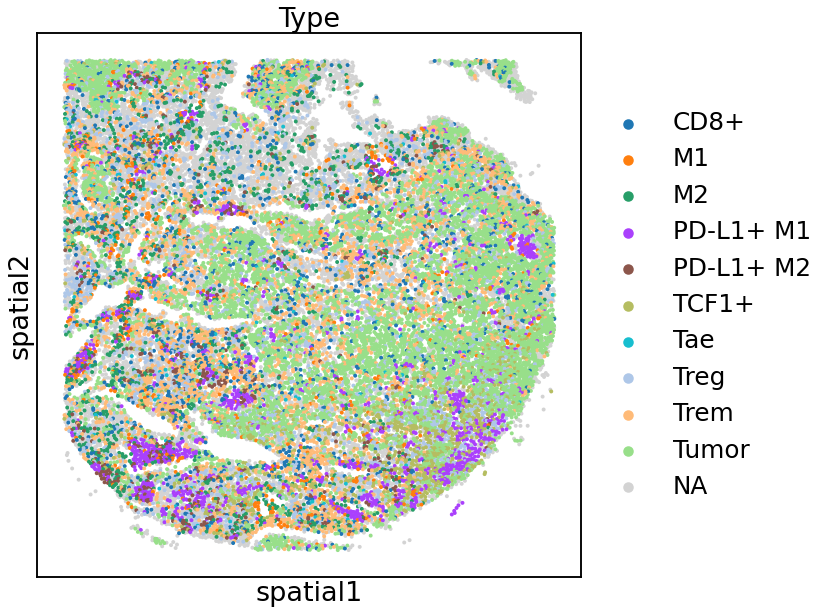

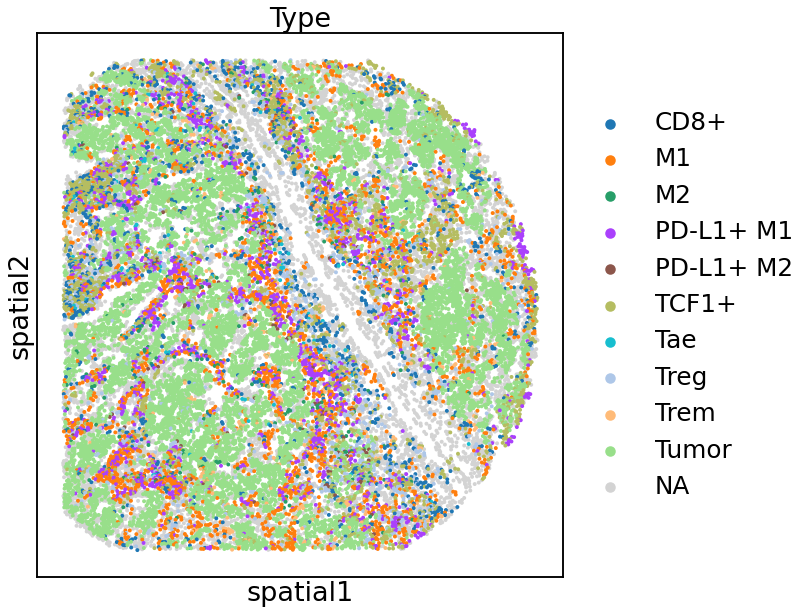

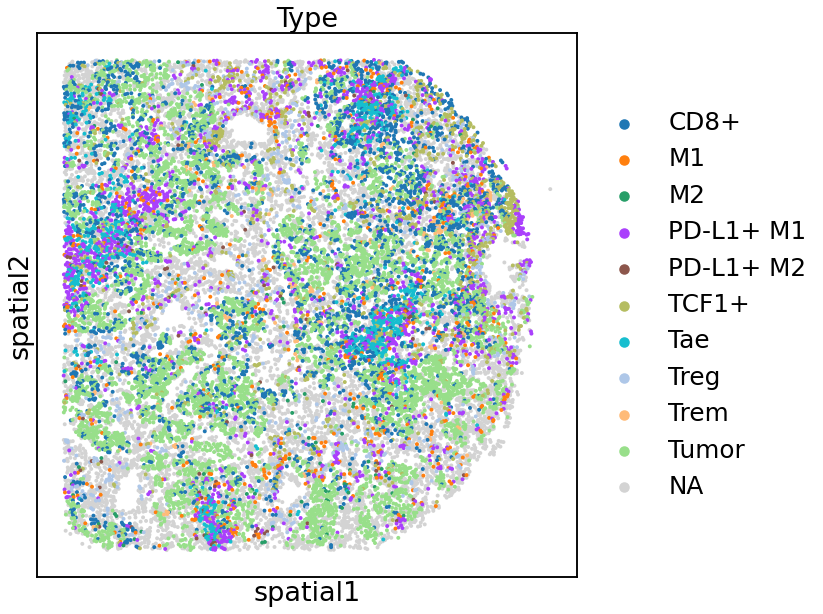

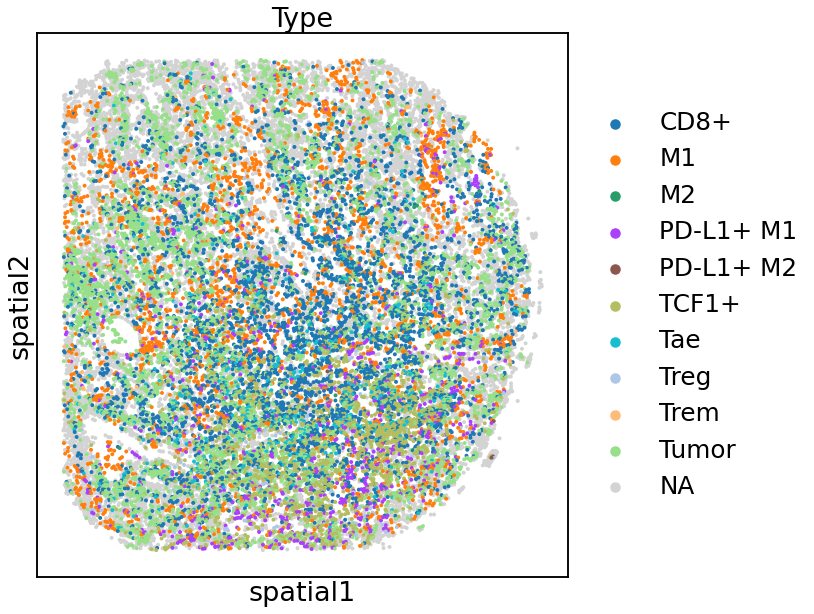

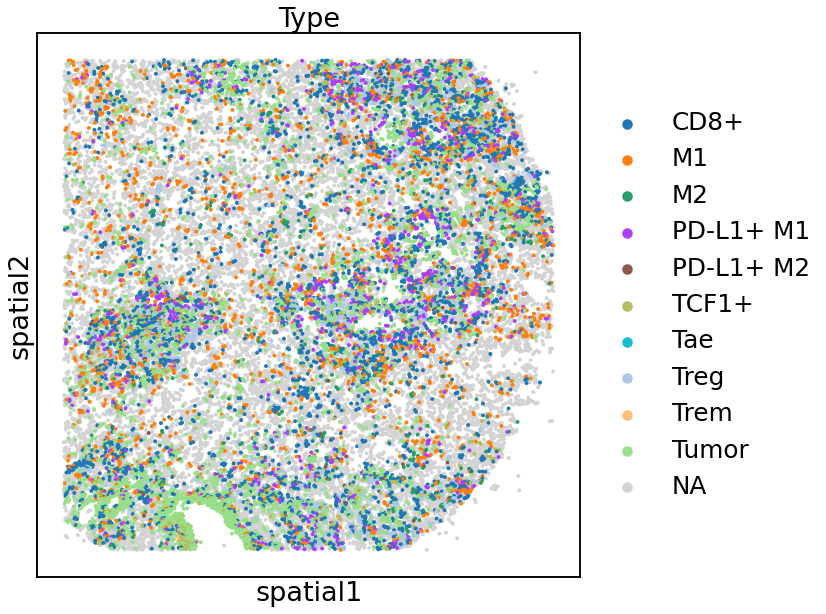

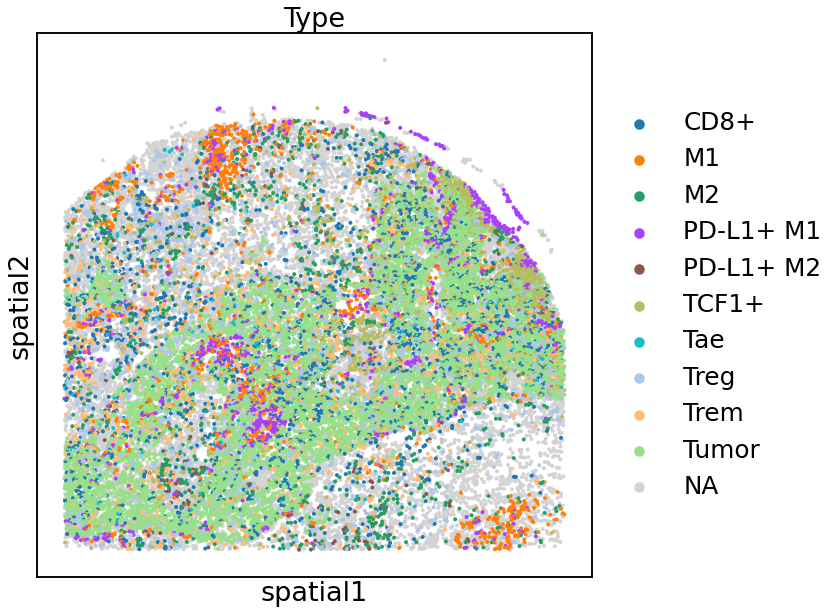

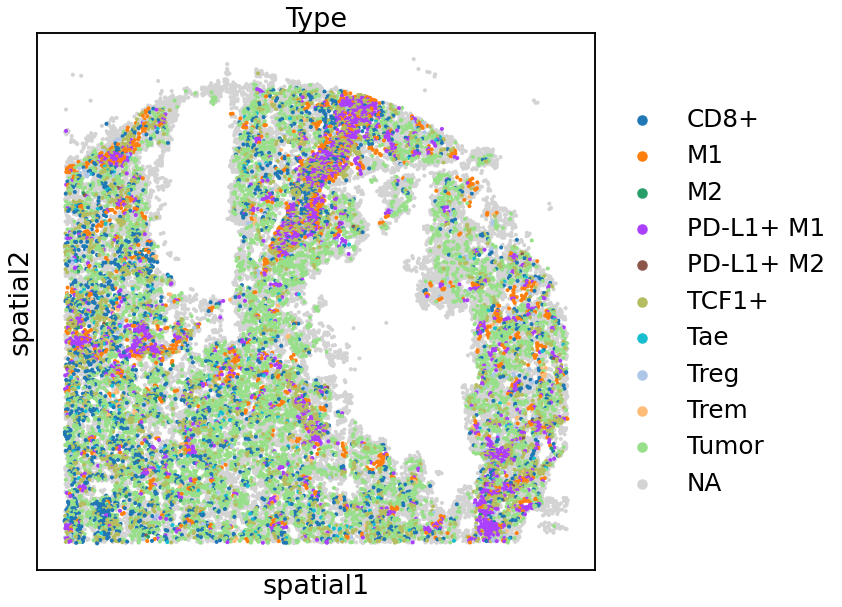

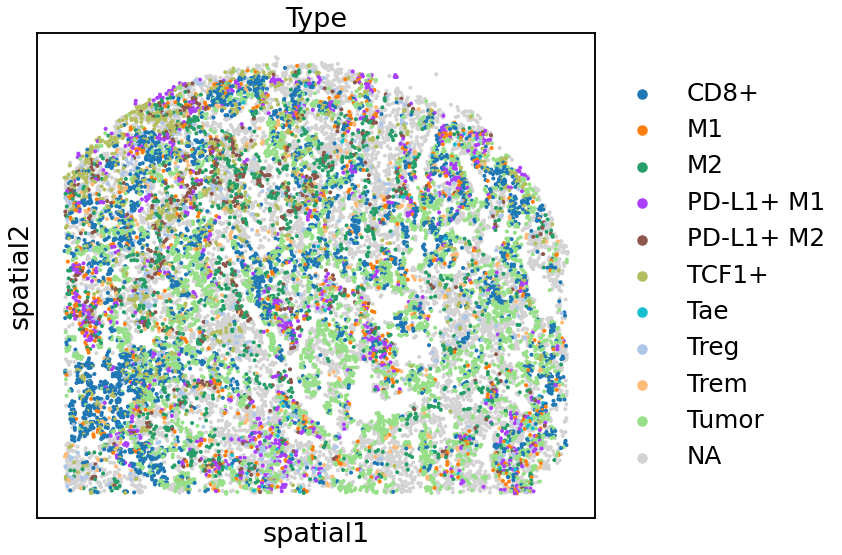

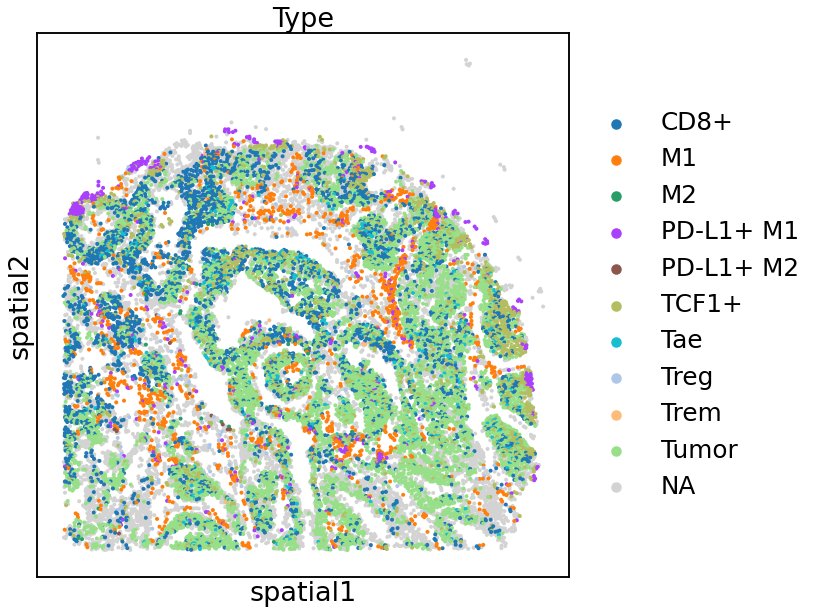

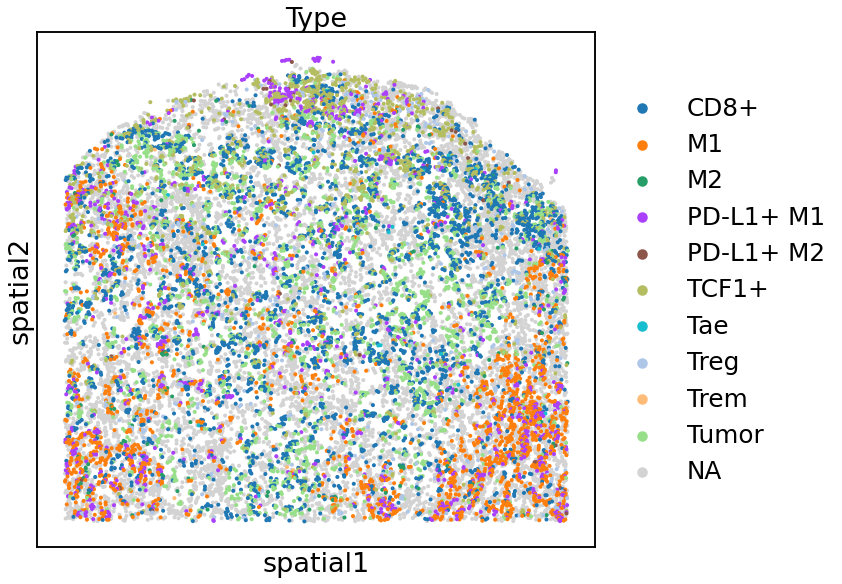

In [154]:
subset = ['Tumor', 'M2', 'M1', 'CD8+', 'Tae', 'Treg', 'Trem', 'TCF1+', 'PD-L1+ M2', 'PD-L1+ M1']
for batch in adata.obs['ROI'].unique():
    adata_subset = adata[adata.obs['ROI'] == batch,]
    with rc_context({'figure.figsize': (10, 10)}):
        sc.pl.spatial(adata_subset, color="Type", groups=subset, spot_size=12)

B7
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


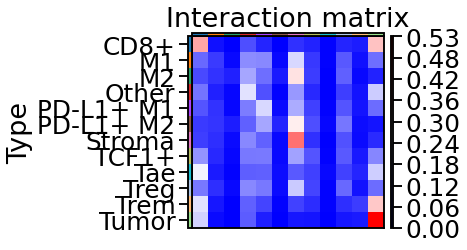

F7
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


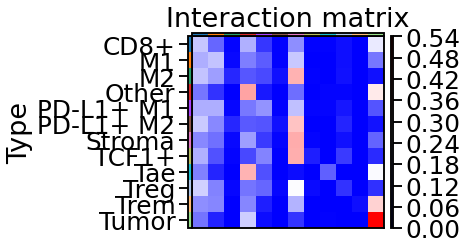

C3
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


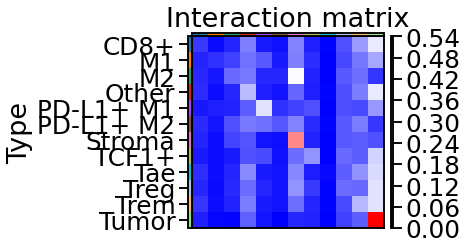

D1
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


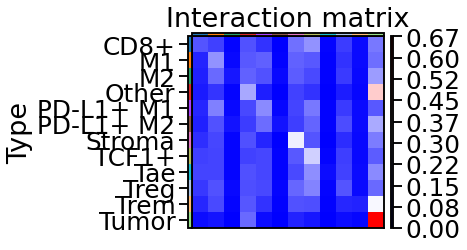

D2
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


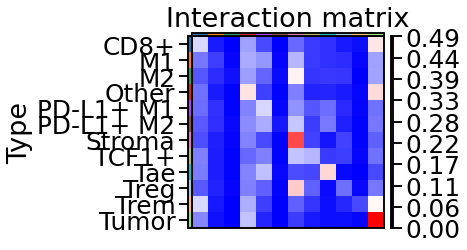

D5
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


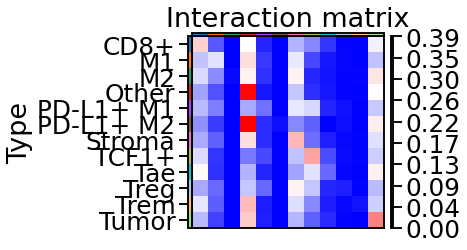

D9
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


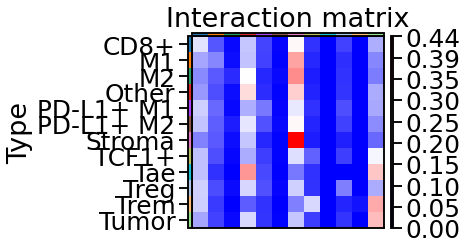

G3
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


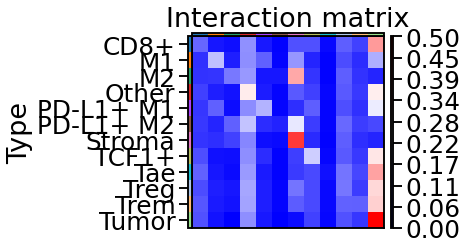

H1
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


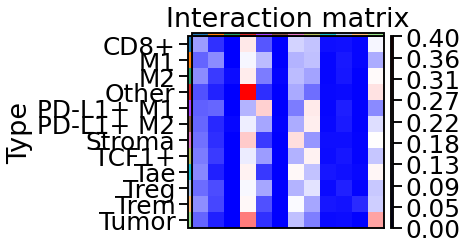

H2
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


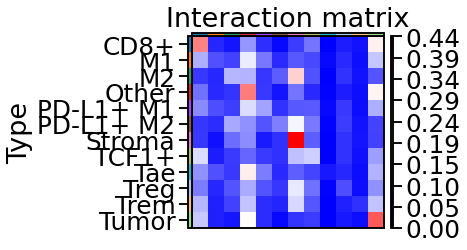

H5
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


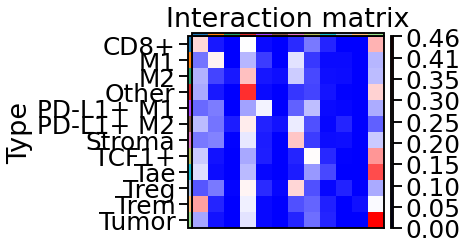

H9
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`


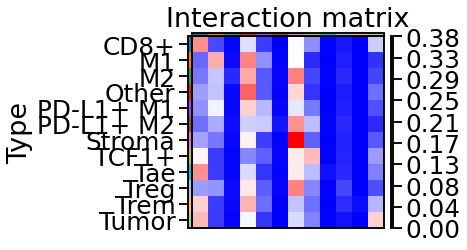

In [155]:
for batch in adata.obs['ROI'].unique():
    print(batch)
    adata_subset = adata[adata.obs['ROI'] == batch,]
        
    sq.gr.spatial_neighbors(adata_subset, radius=30, set_diag=False)

    sq.gr.interaction_matrix(adata_subset, cluster_key="Type", normalized=True)
    sq.pl.interaction_matrix(adata_subset, cluster_key="Type", cmap='bwr', figsize=(3,3))
    plt.show()


# Bar plot

In [156]:
from collections import defaultdict 
from statannotations.Annotator import Annotator
sns.set_context("talk", font_scale=1.5)

In [157]:
density = defaultdict(dict)
for batch in adata.obs['ROI'].unique():
    adata_subset = adata[adata.obs['ROI'] == batch,]
    density[batch] = adata_subset.obs.Type.value_counts().to_dict()

In [158]:
df = pd.DataFrame(density).T
df = df/2.5
df_subset = df
df_subset['Immune Status'] = ['Suppressed', 'Suppressed', 'Inflamed', 'Cold', 'Cold', 'Inflamed', 'Suppressed', 'Inflamed', 'Suppressed', 'Cold', 'Inflamed', 'Cold']
# df_subset = df_subset[df_subset.index.isin(['B7', 'C3', 'D1', 'D2', 'D5', 'D9'])]
df_subset = pd.melt(df_subset, id_vars=['Immune Status'], var_name='Cell Type', value_name='Density')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

M1_Inflamed vs. M1_Suppressed: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=8.000e+00
CD8+_Inflamed vs. CD8+_Suppressed: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=7.000e+00
Tae_Inflamed vs. Tae_Suppressed: Mann-Whitney-Wilcoxon test two-sided, P_val:1.143e-01 U_stat=1.400e+01
Treg_Inflamed vs. Treg_Suppressed: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=9.000e+00
Trem_Inflamed vs. Trem_Suppressed: Mann-Whitney-Wilcoxon test two-sided, P_val:3.429e-01 U_stat=1.200e+01
TCF1+_Inflamed vs. TCF1+_Suppressed: Mann-Whitney-Wilcoxon test two-sided, P_val:3.429e-01 U_stat=1.200e+01
PD-L1+ M2_Inflamed vs. PD-L1+ M2_Suppressed: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=8.000e+00
M2_Suppressed vs. M2_Cold: Mann-Whitney-Wilcoxon test two-sided, P_val:

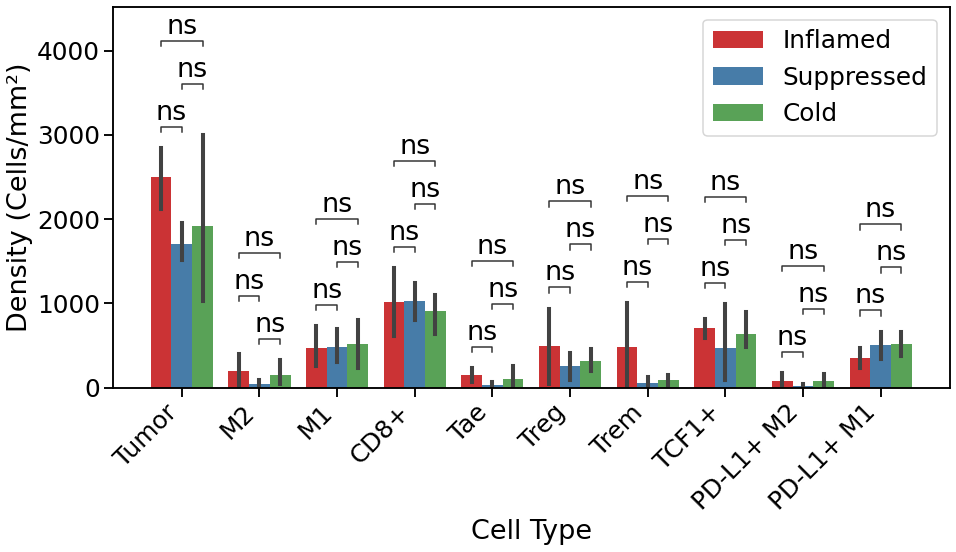

In [159]:
cell_Type = ['Tumor', 'M2', 'M1', 'CD8+', 'Tae', 'Treg', 'Trem', 'TCF1+', 'PD-L1+ M2', 'PD-L1+ M1']

hue_plot_params = {
    'data':      df_subset,
    'x':         'Cell Type',
    'y':         'Density',
    "order":     cell_Type,
    "hue":       "Immune Status",
    "hue_order": ['Inflamed', 'Suppressed', 'Cold'],
    "palette":   "Set1"
}

# Plot
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(**hue_plot_params)
# ax = sns.swarmplot(**hue_plot_params, dodge=True, edgecolor='k', linewidth=1.0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-3:], labels[-3:])
ax.set_ylabel("Density (Cells/mm\u00b2)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Anotation paris
pairs = [[(cell_type, 'Inflamed'), (cell_type, 'Cold')] for cell_type in cell_Type] 
pairs += [[(cell_type, 'Inflamed'), (cell_type, 'Suppressed')] for cell_type in cell_Type] 
pairs +=  [[(cell_type, 'Suppressed'), (cell_type, 'Cold')] for cell_type in cell_Type]

# Add annotations
annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.configure(test='Mann-Whitney', verbose=True)
_, results = annotator.apply_and_annotate()


In [160]:
interactions = defaultdict(dict)

for batch in adata.obs['ROI'].unique():
    print(batch)
    adata_subset = adata[adata.obs['ROI'] == batch,]
        
    sq.gr.spatial_neighbors(adata_subset, radius=30, set_diag=False)

    sq.gr.interaction_matrix(adata_subset, cluster_key="Type", normalized=True)
    interaction_tumor = adata_subset.uns['Type_interactions'][:,-1]
    interactions[batch] = interaction_tumor

B7
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`
F7
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`
C3
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['Type_interactions']`
D1
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns

In [161]:
type_list = adata_subset.obs.Type.cat.categories.tolist()

df = pd.DataFrame(interactions, index=type_list).T
df_subset = df.drop(['Other', 'Stroma'], axis=1)
df_subset['Immune Status'] = ['Suppressed', 'Suppressed', 'Inflamed', 'Cold', 'Cold', 'Inflamed', 'Suppressed', 'Inflamed', 'Suppressed', 'Cold', 'Inflamed', 'Cold']
# df_subset = df_subset[df_subset.index.isin(['B7', 'C3', 'D1', 'D2', 'D5', 'D9'])]
df_subset = pd.melt(df_subset, id_vars=['Immune Status'], var_name='Cell Type', value_name='Density')

[Text(0, 0, 'CD8+'),
 Text(1, 0, 'M1'),
 Text(2, 0, 'M2'),
 Text(3, 0, 'PD-L1+ M1'),
 Text(4, 0, 'PD-L1+ M2'),
 Text(5, 0, 'TCF1+'),
 Text(6, 0, 'Tae'),
 Text(7, 0, 'Treg'),
 Text(8, 0, 'Trem'),
 Text(9, 0, 'Tumor')]

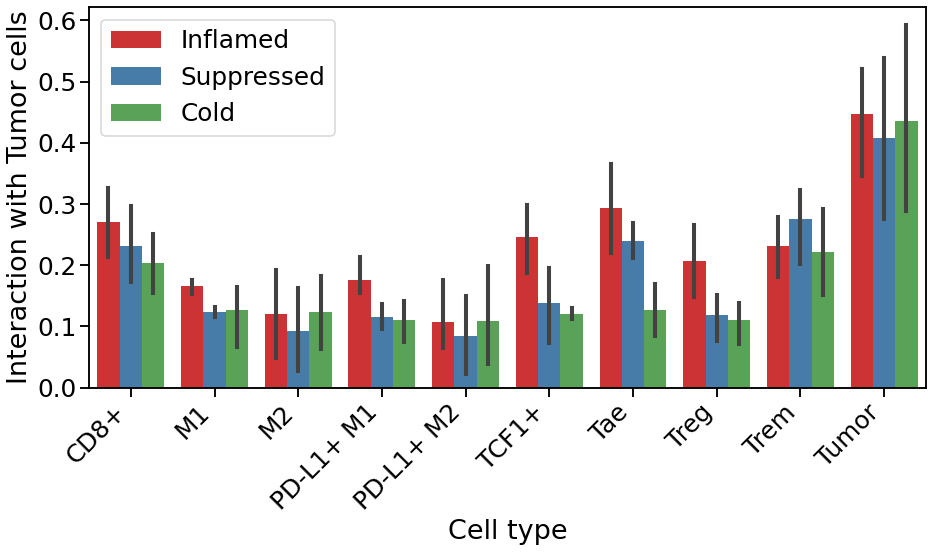

In [162]:
cell_Type = df_subset['Cell Type'].unique().tolist()
hue_plot_params = {
    'data':      df_subset,
    'x':         'Cell Type',
    'y':         'Density',
    "hue":       "Immune Status",
    "hue_order": ['Inflamed', 'Suppressed', 'Cold'],
    "palette":   "Set1"
}

# Plot
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(**hue_plot_params)
# ax = sns.swarmplot(**hue_plot_params, dodge=True, edgecolor='k', linewidth=1.0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-3:], labels[-3:])
ax.set_ylabel("Interaction with Tumor cells")
ax.set_xlabel("Cell type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


# # Anotation paris
# pairs = [[(cell_type, 'Inflamed'), (cell_type, 'Cold')] for cell_type in cell_Type] 
# pairs += [[(cell_type, 'Inflamed'), (cell_type, 'Suppressed')] for cell_type in cell_Type] 
# pairs +=  [[(cell_type, 'Suppressed'), (cell_type, 'Cold')] for cell_type in cell_Type]

# # Add annotations
# annotator = Annotator(ax, pairs, **hue_plot_params)
# annotator.configure(test='t-test_ind', verbose=True)
# _, results = annotator.apply_and_annotate()
